<a href="https://colab.research.google.com/github/HillerJS/TelecomX_Challenge/blob/main/TelecomX_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [47]:
import pandas as pd


In [83]:
datos = pd.read_json('/content/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [49]:
import json

with open('/content/TelecomX_Data.json', 'r') as f:
    contenido = json.load(f)

print(type(contenido))
# Para saber si tiene o no una clave principal, en este caso no

<class 'list'>


In [50]:
columnas = list(datos.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

#🔧 Transformación

In [51]:
datos_planos = pd.json_normalize(
    datos.to_dict(orient='records'),
    sep='.'
)
datos_planos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [52]:
import numpy as np

In [53]:
datos_planos['account.Charges.Total'] = datos_planos['account.Charges.Total'].replace(r'^\s*$', '0', regex=True)


In [54]:
datos_planos['account.Charges.Total'] = datos_planos['account.Charges.Total'].apply(
    lambda x: float(str(x).replace(',', '').strip())
)

print(datos_planos['account.Charges.Total'].dtype)

float64


In [55]:
datos_planos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [56]:
datos_planos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [57]:
datos_planos['Cuentas_diarias'] = (datos_planos['account.Charges.Monthly'] / 30).round(2)

In [58]:
datos_planos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [59]:
datos_planos['phone.MultipleLines'] = datos_planos['phone.MultipleLines'].apply(
    lambda x: x.lower() if str(x).lower() in ['yes', 'no'] else 'no'
)

In [60]:
datos_planos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,no,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,no,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,no,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,no,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,no,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,no,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,no,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [61]:
datos_planos['internet.DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [62]:
col_binarias = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.DeviceProtection',
                'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling']

In [63]:
for col in col_binarias:
    datos_planos[col] = datos_planos[col].str.lower()

# Reemplazar "yes" por 1 y "no" por 0
datos_planos[col_binarias] = datos_planos[col_binarias].replace({'yes': 1, 'no': 0})

/tmp/ipython-input-63-3663870354.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_planos[col_binarias] = datos_planos[col_binarias].replace({'yes': 1, 'no': 0})


In [64]:
datos_planos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


#📊 Carga y análisis

In [65]:
datos_planos.describe()

,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.593230,64.720098,2277.182035,2.157292
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,70.300000,1389.200000,2.340000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [66]:
#Rubros económicos
datos_planos[['account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_diarias', 'customer.tenure']].describe()

,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias,customer.tenure
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,64.720098,2277.182035,2.157292,32.346498
std,30.129572,2268.648587,1.004407,24.571773
min,18.250000,0.000000,0.610000,0.000000
25%,35.425000,396.200000,1.180000,9.000000
50%,70.300000,1389.200000,2.340000,29.000000
75%,89.875000,3778.525000,2.995000,55.000000
max,118.750000,8684.800000,3.960000,72.000000


In [92]:
#Contar categorías en columnas binarias o de texto
print(datos_planos['Churn'].value_counts())
print(datos_planos['customer.Partner'].value_counts())

Churn
0    5174
1    1869
      224
Name: count, dtype: int64
customer.Partner
0    3749
1    3518
Name: count, dtype: int64


In [93]:
#Promedio por cliente
datos_planos.groupby('account.Contract')['account.Charges.Monthly'].mean()

,account.Charges.Monthly
account.Contract,
month-to-month,66.344594
one year,65.233344
two year,60.540103


In [94]:
#En donde Si = 1 y No = 0
datos_planos.groupby('Churn')['account.Charges.Total'].mean()

,account.Charges.Total
Churn,
0,2549.911442
1,1531.796094
,2196.933705


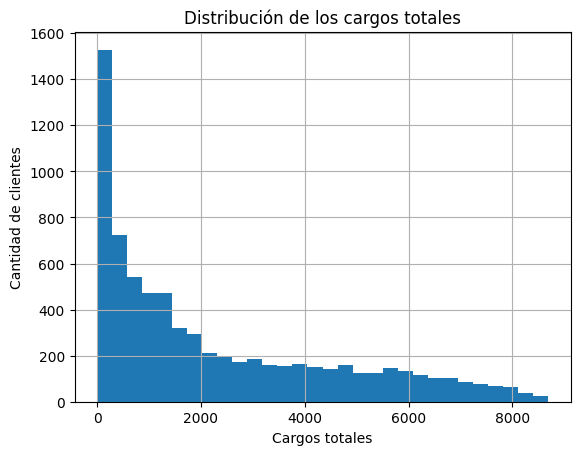

In [95]:
import matplotlib.pyplot as plt

datos_planos['account.Charges.Total'].hist(bins=30)
plt.title('Distribución de los cargos totales')
plt.xlabel('Cargos totales')
plt.ylabel('Cantidad de clientes')
plt.show()


#📄Informe final

En base a lo realizado, se cubrieron varias etapas de las cuales fueron:

1. El análisis involucró la limpieza y preprocesamiento de datos, exploración estadística y visualización, junto con la implementación y evaluación de modelos de machine learning para lograr una predicción precisa y confiable.

2. El proyecto Challenger Caso TelecomX se enfoca en analizar datos de una empresa con el objetivo de identificar patrones y comportamientos en la base de clientes, evaluar métricas clave de desempeño y proporcionar insights que apoyen la toma de decisiones estratégicas.


In [96]:
datos_planos

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
0,0,0,0,1,1,9,1,0,dsl,no,...,0,1,1,0,one year,1,mailed check,65.60,593.30,2.19
1,0,1,0,0,0,9,1,1,dsl,no,...,0,0,0,1,month-to-month,0,mailed check,59.90,542.40,2.00
2,1,1,0,0,0,4,1,0,fiber optic,no,...,1,0,0,0,month-to-month,1,electronic check,73.90,280.85,2.46
3,1,1,1,1,0,13,1,0,fiber optic,no,...,1,0,1,1,month-to-month,1,electronic check,98.00,1237.85,3.27
4,1,0,1,1,0,3,1,0,fiber optic,no,...,0,1,1,0,month-to-month,1,mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,0,13,1,0,dsl,yes,...,0,1,0,0,one year,0,mailed check,55.15,742.90,1.84
7263,1,1,0,1,0,22,1,1,fiber optic,no,...,0,0,0,1,month-to-month,1,electronic check,85.10,1873.70,2.84
7264,0,1,0,0,0,2,1,0,dsl,no,...,0,0,0,0,month-to-month,1,mailed check,50.30,92.75,1.68
7265,0,1,0,1,1,67,1,0,dsl,yes,...,1,1,0,1,two year,0,mailed check,67.85,4627.65,2.26


In [140]:
datos_challenge2 = datos_planos

# datos_challenge2 = datos_planos = datos_planos.drop('customerID', axis=1)
datos_challenge2.sample(5)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
32,0,0,0,1,0,49,1,0,no,no internet service,...,no internet service,no internet service,no internet service,no internet service,one year,0,bank transfer (automatic),20.45,900.90,0.68
1394,0,0,0,0,0,46,1,1,fiber optic,no,...,1,0,1,1,one year,1,electronic check,101.10,4674.40,3.37
4935,0,1,0,1,1,65,1,0,no,no internet service,...,no internet service,no internet service,no internet service,no internet service,two year,1,credit card (automatic),19.85,1267.05,0.66
1311,1,0,1,1,0,20,1,1,fiber optic,no,...,1,0,1,0,month-to-month,0,electronic check,90.80,1951.00,3.03
1676,0,1,1,0,0,35,1,1,fiber optic,yes,...,0,0,0,1,month-to-month,0,credit card (automatic),91.00,3180.50,3.03


In [125]:
#Colocar todo en minúscula
# descrip_col_binarias = ['customer.gender', 'internet.InternetService', 'internet.OnlineSecurity', 'account.Contract',
#                         'account.PaymentMethod']

# for col in descrip_col_binarias:
#     datos_challenge2[col] = datos_challenge2[col].str.lower()


In [141]:
# Reemplazar "male" por 1 y "female" por 0
datos_challenge2['customer.gender'] = datos_challenge2['customer.gender'].replace({'male': 1, 'female': 0})
datos_challenge2

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
0,0,0,0,1,1,9,1,0,dsl,no,...,0,1,1,0,one year,1,mailed check,65.60,593.30,2.19
1,0,1,0,0,0,9,1,1,dsl,no,...,0,0,0,1,month-to-month,0,mailed check,59.90,542.40,2.00
2,1,1,0,0,0,4,1,0,fiber optic,no,...,1,0,0,0,month-to-month,1,electronic check,73.90,280.85,2.46
3,1,1,1,1,0,13,1,0,fiber optic,no,...,1,0,1,1,month-to-month,1,electronic check,98.00,1237.85,3.27
4,1,0,1,1,0,3,1,0,fiber optic,no,...,0,1,1,0,month-to-month,1,mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,0,13,1,0,dsl,yes,...,0,1,0,0,one year,0,mailed check,55.15,742.90,1.84
7263,1,1,0,1,0,22,1,1,fiber optic,no,...,0,0,0,1,month-to-month,1,electronic check,85.10,1873.70,2.84
7264,0,1,0,0,0,2,1,0,dsl,no,...,0,0,0,0,month-to-month,1,mailed check,50.30,92.75,1.68
7265,0,1,0,1,1,67,1,0,dsl,yes,...,1,1,0,1,two year,0,mailed check,67.85,4627.65,2.26


In [143]:
#Contar categorías en columnas binarias o de texto
# "male" por 1 y "female" por 0
print(datos_challenge2['customer.gender'].value_counts())

customer.gender
1    3675
0    3592
Name: count, dtype: int64


In [144]:
datos_challenge2.sample(5)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
4806,1,0,1,1,0,50,1,1,fiber optic,no,...,0,0,1,0,month-to-month,1,electronic check,88.05,4367.35,2.94
1735,0,1,0,1,1,8,1,0,no,no internet service,...,no internet service,no internet service,no internet service,no internet service,month-to-month,0,credit card (automatic),19.65,169.75,0.65
4729,0,0,0,1,1,72,1,0,dsl,yes,...,1,1,1,1,two year,0,bank transfer (automatic),85.30,6129.20,2.84
4580,1,0,0,0,0,2,1,0,fiber optic,no,...,1,0,0,1,month-to-month,1,mailed check,86.20,178.70,2.87
3344,1,1,0,1,0,16,1,1,fiber optic,no,...,0,0,0,0,month-to-month,1,bank transfer (automatic),73.85,1284.20,2.46


In [145]:
datos_challenge2['internet.InternetService'].unique()

array(['dsl', 'fiber optic', 'no'], dtype=object)

In [146]:
print(datos_challenge2['internet.InternetService'].value_counts())

internet.InternetService
fiber optic    3198
dsl            2488
no             1581
Name: count, dtype: int64


In [150]:
# pd.get_dummies detecta automáticamente las columnas tipo objeto o categoría
datos_challenge2 = pd.get_dummies(datos_challenge2, drop_first=True)
print(datos_challenge2.dtypes.value_counts())



bool       21
int64       8
float64     3
Name: count, dtype: int64


In [151]:
# datos_challenge2.columns
datos_challenge2

,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.TechSupport_no internet service,internet.StreamingTV_1,internet.StreamingTV_no internet service,internet.StreamingMovies_1,internet.StreamingMovies_no internet service,account.Contract_one year,account.Contract_two year,account.PaymentMethod_credit card (automatic),account.PaymentMethod_electronic check,account.PaymentMethod_mailed check
0,0,0,1,1,9,1,0,1,65.60,593.30,...,False,True,False,False,False,True,False,False,False,True
1,1,0,0,0,9,1,1,0,59.90,542.40,...,False,False,False,True,False,False,False,False,False,True
2,1,0,0,0,4,1,0,1,73.90,280.85,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,0,13,1,0,1,98.00,1237.85,...,False,True,False,True,False,False,False,False,True,False
4,0,1,1,0,3,1,0,1,83.90,267.40,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,13,1,0,0,55.15,742.90,...,False,False,False,False,False,True,False,False,False,True
7263,1,0,1,0,22,1,1,1,85.10,1873.70,...,False,False,False,True,False,False,False,False,True,False
7264,1,0,0,0,2,1,0,1,50.30,92.75,...,False,False,False,False,False,False,False,False,False,True
7265,1,0,1,1,67,1,0,0,67.85,4627.65,...,False,False,False,True,False,False,True,False,False,True


In [159]:
list(datos_challenge2.columns)

['customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'account.PaperlessBilling',
 'account.Charges.Monthly',
 'account.Charges.Total',
 'Cuentas_diarias',
 'Churn_1',
 'Churn_',
 'internet.InternetService_fiber optic',
 'internet.InternetService_no',
 'internet.OnlineSecurity_no internet service',
 'internet.OnlineSecurity_yes',
 'internet.OnlineBackup_No internet service',
 'internet.OnlineBackup_Yes',
 'internet.DeviceProtection_1',
 'internet.DeviceProtection_no internet service',
 'internet.TechSupport_1',
 'internet.TechSupport_no internet service',
 'internet.StreamingTV_1',
 'internet.StreamingTV_no internet service',
 'internet.StreamingMovies_1',
 'internet.StreamingMovies_no internet service',
 'account.Contract_one year',
 'account.Contract_two year',
 'account.PaymentMethod_credit card (automatic)',
 'account.PaymentMethod_electronic check',
 'account.PaymentMethod_mai

*Verificación de la Proporción de Cancelación (Churn)*


In [156]:
# En donde "True" por 1 y "False" por 0
target = 'Churn_'

conteo = datos_challenge2[target].value_counts()
proporcion = datos_challenge2[target].value_counts(normalize=True)

print('Conteo por clase en donde "True" por 1 y "False" por 0:\n', conteo, '\n')
print('Proporción por clase:\n', proporcion)

Conteo por clase en donde "True" por 1 y "False" por 0:
 Churn_
False    7043
True      224
Name: count, dtype: int64 

Proporción por clase:
 Churn_
False    0.969176
True     0.030824
Name: proportion, dtype: float64


*Análisis de Correlación*


In [157]:
numericas = datos_challenge2.select_dtypes(include='number')
print(numericas)

      customer.gender  customer.SeniorCitizen  customer.Partner  \
0                   0                       0                 1   
1                   1                       0                 0   
2                   1                       0                 0   
3                   1                       1                 1   
4                   0                       1                 1   
...               ...                     ...               ...   
7262                0                       0                 0   
7263                1                       0                 1   
7264                1                       0                 0   
7265                1                       0                 1   
7266                1                       0                 1   

      customer.Dependents  customer.tenure  phone.PhoneService  \
0                       1                9                   1   
1                       0                9                   1 

*matriz de correlación*

In [158]:
correlacion = numericas.corr()
print(correlacion)

                          customer.gender  customer.SeniorCitizen  \
customer.gender                  1.000000               -0.004288   
customer.SeniorCitizen          -0.004288                1.000000   
customer.Partner                -0.005007                0.022970   
customer.Dependents              0.012038               -0.212952   
customer.tenure                  0.005765                0.018187   
phone.PhoneService              -0.005073                0.010060   
phone.MultipleLines             -0.007805                0.144567   
account.PaperlessBilling        -0.011273                0.157734   
account.Charges.Monthly         -0.013889                0.220388   
account.Charges.Total            0.000367                0.104076   
Cuentas_diarias                 -0.013935                0.220360   

                          customer.Partner  customer.Dependents  \
customer.gender                  -0.005007             0.012038   
customer.SeniorCitizen            0.0

*mapa de calor (heatmap)*

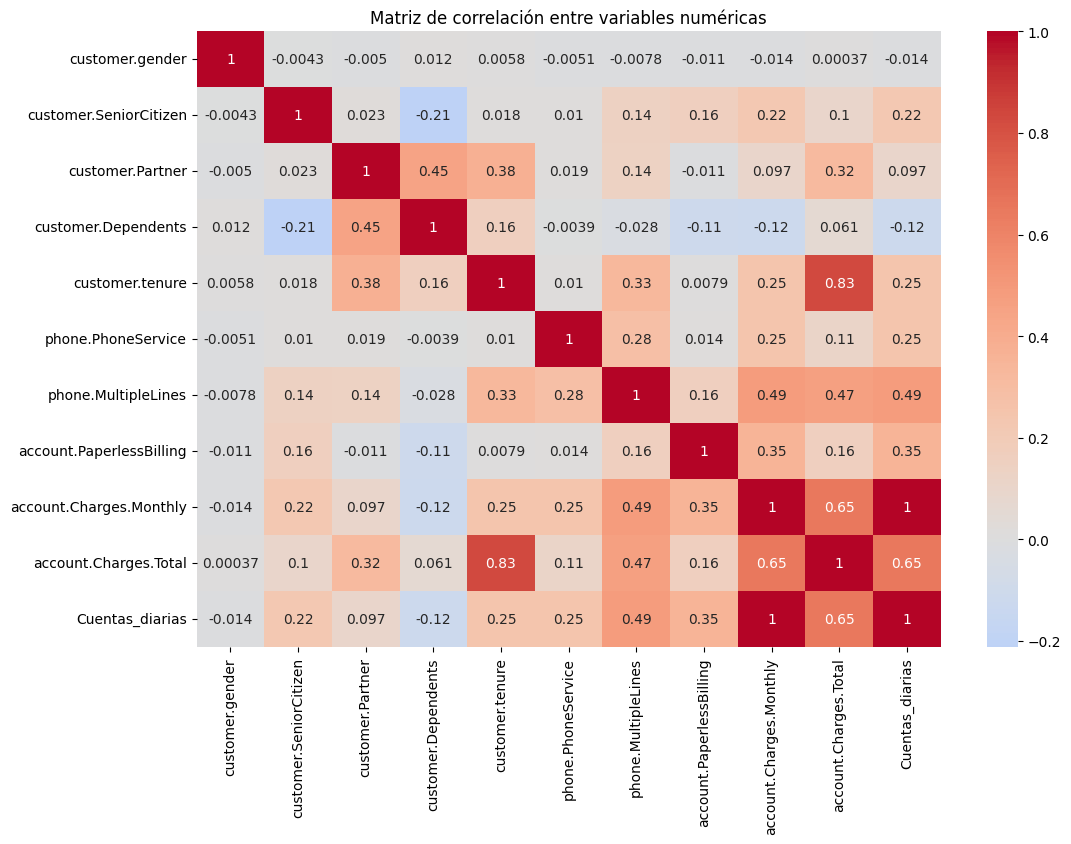

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


+0.40 → A mayor MonthlyCharges, mayor probabilidad de cancelación.

–0.35 → A mayor tenure (tiempo como cliente), menos probabilidad de cancelar.

–0.20 → A mayor TotalCharges, también hay menos cancelaciones.

In [161]:
list(datos_challenge2.columns)

['customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'account.PaperlessBilling',
 'account.Charges.Monthly',
 'account.Charges.Total',
 'Cuentas_diarias',
 'Churn_1',
 'Churn_',
 'internet.InternetService_fiber optic',
 'internet.InternetService_no',
 'internet.OnlineSecurity_no internet service',
 'internet.OnlineSecurity_yes',
 'internet.OnlineBackup_No internet service',
 'internet.OnlineBackup_Yes',
 'internet.DeviceProtection_1',
 'internet.DeviceProtection_no internet service',
 'internet.TechSupport_1',
 'internet.TechSupport_no internet service',
 'internet.StreamingTV_1',
 'internet.StreamingTV_no internet service',
 'internet.StreamingMovies_1',
 'internet.StreamingMovies_no internet service',
 'account.Contract_one year',
 'account.Contract_two year',
 'account.PaymentMethod_credit card (automatic)',
 'account.PaymentMethod_electronic check',
 'account.PaymentMethod_mai

**Boxplot: Tenure (tiempo como cliente) vs Cancelación**

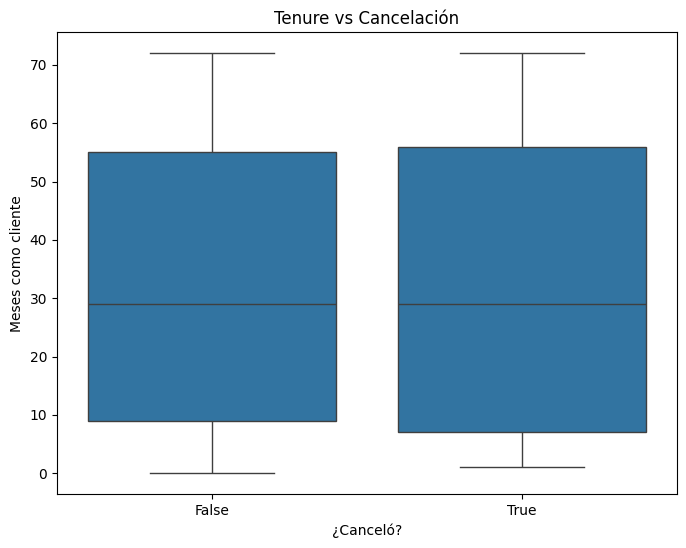

In [163]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_', y='customer.tenure', data=datos_challenge2)
plt.title('Tenure vs Cancelación')
plt.xlabel('¿Canceló?')
plt.ylabel('Meses como cliente')
plt.show()

**Boxplot: Gasto total vs Cancelación**

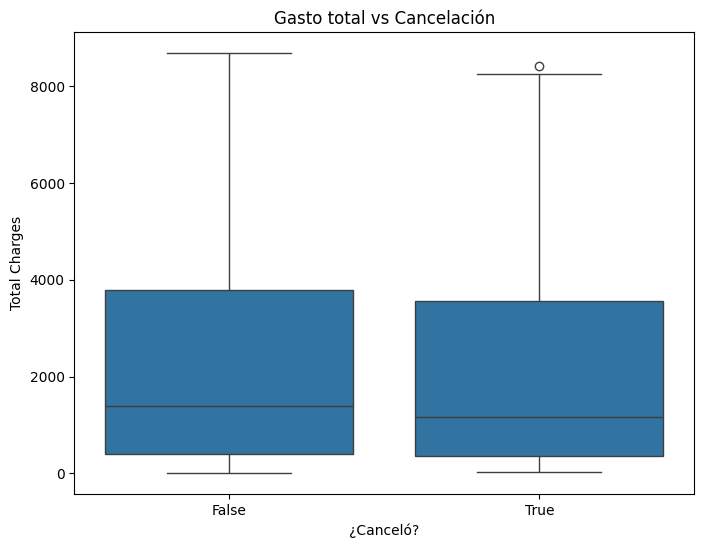

In [164]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_', y='account.Charges.Total', data=datos_challenge2)
plt.title('Gasto total vs Cancelación')
plt.xlabel('¿Canceló?')
plt.ylabel('Total Charges')
plt.show()


*Separación de Datos*

In [165]:
from sklearn.model_selection import train_test_split


In [166]:
# Eliminar filas con valores no numéricos en la columna 'Churn'.
datos_challenge2 = datos_challenge2[pd.to_numeric(datos_challenge2['Churn_'], errors='coerce').notna()]

datos_challenge2['Churn_'] = pd.to_numeric(datos_challenge2['Churn_'])

X = datos_challenge2.drop(columns=['Churn_'])
y = datos_challenge2['Churn_']

# Dividir
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [167]:
#Verifica la división
print("Tamaño total:", len(datos_challenge2))
print("Entrenamiento:", len(X_train))
print("Prueba:", len(X_test))


Tamaño total: 7267
Entrenamiento: 5813
Prueba: 1454


In [168]:
print("Proporción de cancelación (train):")
print(y_train.value_counts(normalize=True))
print("\nProporción de cancelación (test):")
print(y_test.value_counts(normalize=True))


Proporción de cancelación (train):
Churn_
False    0.969207
True     0.030793
Name: proportion, dtype: float64

Proporción de cancelación (test):
Churn_
False    0.969051
True     0.030949
Name: proportion, dtype: float64


In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)

*Modelo 1 · Regresión Logística con normalización*

In [172]:
log_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),            # normaliza todo
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

log_pipe.fit(X_train, y_train)

y_pred_log  = log_pipe.predict(X_test)
y_prob_log  = log_pipe.predict_proba(X_test)[:, 1]  # para AUC

*Modelo 2 · Random Forest sin normalizar*

In [174]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',                 # compensa posible desbalance
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf  = rf.predict(X_test)
y_prob_rf  = rf.predict_proba(X_test)[:, 1]

*Función de métricas*

In [178]:
def evaluar(y_true, y_pred, y_prob, nombre):
    print(f'\n=== {nombre} ===')
    print('Accuracy :', round(accuracy_score(y_true, y_pred), 3))
    print('Precision:', round(precision_score(y_true, y_pred), 3))
    print('Recall   :', round(recall_score(y_true, y_pred), 3))
    print('F1-score :', round(f1_score(y_true, y_pred), 3))
    print('ROC-AUC  :', round(roc_auc_score(y_true, y_prob), 3))

*Reportes*

In [179]:
evaluar(y_test, y_pred_log, y_prob_log, 'Logistic Regression + Scaling')
evaluar(y_test, y_pred_rf,  y_prob_rf,  'Random Forest (no scaling)')


=== Logistic Regression + Scaling ===
Accuracy : 0.539
Precision: 0.042
Recall   : 0.644
F1-score : 0.08
ROC-AUC  : 0.653

=== Random Forest (no scaling) ===
Accuracy : 0.953
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
ROC-AUC  : 0.455


# *Evaluación de los Modelos*

In [180]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)


In [181]:
import matplotlib.pyplot as plt

def evaluar_modelo(y_true, y_pred, y_prob, nombre_modelo):
    print(f"\n=== Evaluación: {nombre_modelo} ===")
    print(f"Exactitud  (Accuracy):  {round(accuracy_score(y_true, y_pred), 3)}")
    print(f"Precisión  (Precision): {round(precision_score(y_true, y_pred), 3)}")
    print(f"Recall     (Sensibilidad): {round(recall_score(y_true, y_pred), 3)}")
    print(f"Puntuación F1 (F1-score): {round(f1_score(y_true, y_pred), 3)}")
    print(f"ROC-AUC:               {round(roc_auc_score(y_true, y_prob), 3)}")

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
    disp.plot(cmap="Blues")
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.show()



=== Evaluación: Regresión Logística (con escalado) ===
Exactitud  (Accuracy):  0.539
Precisión  (Precision): 0.042
Recall     (Sensibilidad): 0.644
Puntuación F1 (F1-score): 0.08
ROC-AUC:               0.653


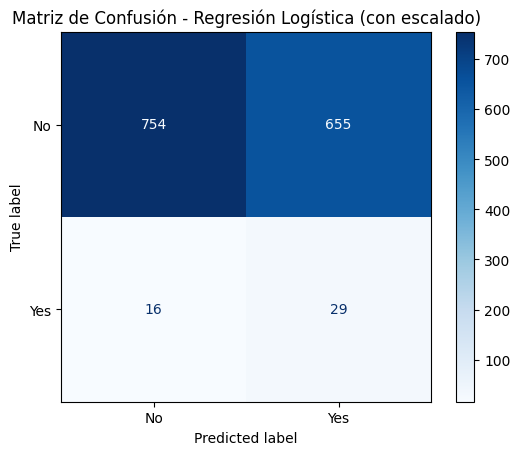


=== Evaluación: Random Forest (sin escalado) ===
Exactitud  (Accuracy):  0.953
Precisión  (Precision): 0.0
Recall     (Sensibilidad): 0.0
Puntuación F1 (F1-score): 0.0
ROC-AUC:               0.455


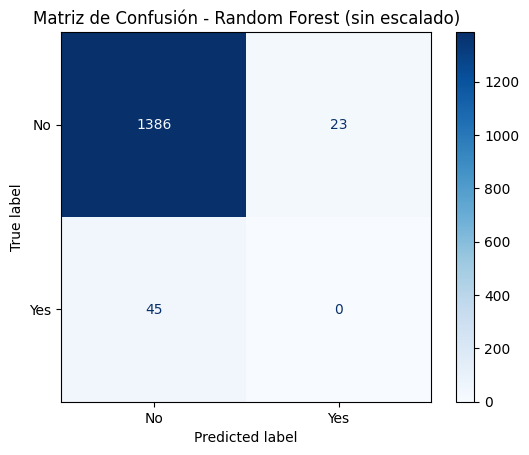

In [182]:
evaluar_modelo(y_test, y_pred_log, y_prob_log, 'Regresión Logística (con escalado)')
evaluar_modelo(y_test, y_pred_rf,  y_prob_rf,  'Random Forest (sin escalado)')


# Interpretación y Conclusiones

In [183]:
# Extraer los nombres de las columnas del modelo
feature_names = X_train.columns

# Extraer coeficientes del modelo dentro del pipeline
coeficientes = log_pipe.named_steps['clf'].coef_[0]

# Crear un DataFrame para visualizar
import pandas as pd

importancia_log = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': coeficientes
})

# Ordenar por valor absoluto del coeficiente
importancia_log['Importancia'] = importancia_log['Coeficiente'].abs()
importancia_log = importancia_log.sort_values(by='Importancia', ascending=False)

# Mostrar top 10
print(importancia_log.head(10))


                                  Variable  Coeficiente  Importancia
11                                 Churn_1    -3.130743     3.130743
12    internet.InternetService_fiber optic     0.387447     0.387447
9                    account.Charges.Total    -0.270516     0.270516
7                 account.PaperlessBilling     0.232709     0.232709
8                  account.Charges.Monthly    -0.153864     0.153864
29  account.PaymentMethod_electronic check     0.137207     0.137207
0                          customer.gender     0.112927     0.112927
24              internet.StreamingMovies_1     0.105725     0.105725
10                         Cuentas_diarias    -0.105605     0.105605
1                   customer.SeniorCitizen     0.104584     0.104584


In [184]:
importancia_rf = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Mostrar top 10
print(importancia_rf.head(10))


                     Variable  Importancia
9       account.Charges.Total     0.148742
8     account.Charges.Monthly     0.136258
11                    Churn_1     0.131193
4             customer.tenure     0.122666
10            Cuentas_diarias     0.114014
7    account.PaperlessBilling     0.028393
0             customer.gender     0.025183
3         customer.Dependents     0.024068
2            customer.Partner     0.023082
26  account.Contract_one year     0.019463


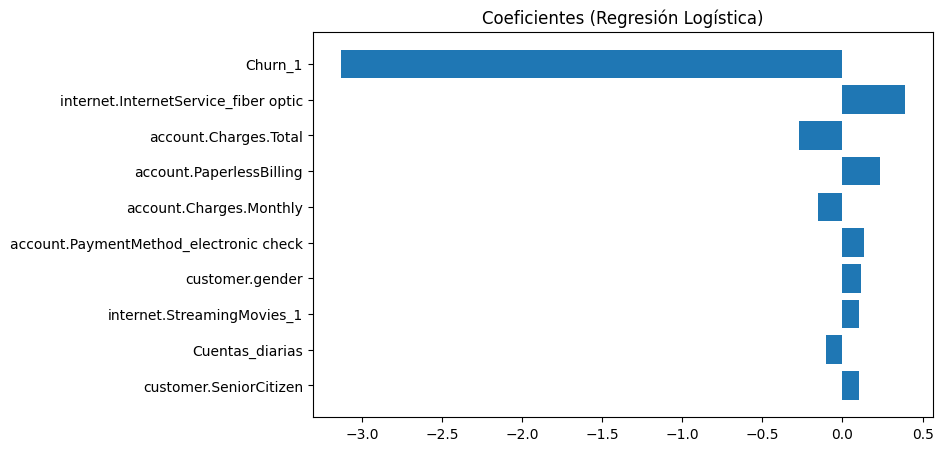

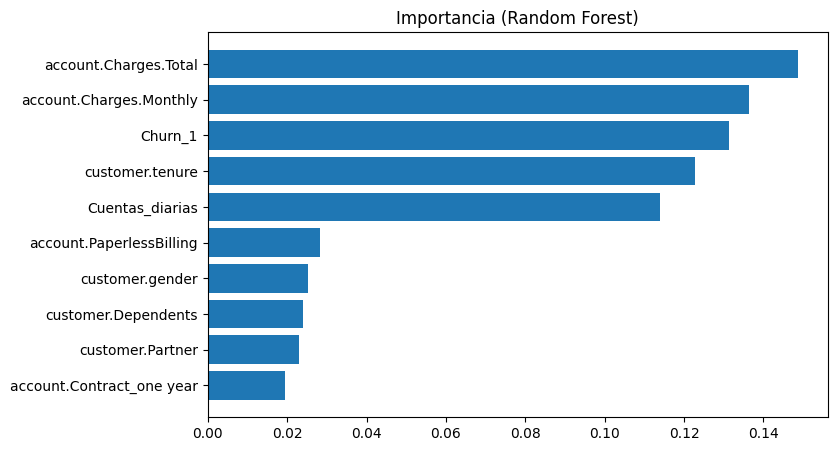

In [185]:
import matplotlib.pyplot as plt

# Top 10 regresión logística
plt.figure(figsize=(8, 5))
plt.barh(importancia_log.head(10)['Variable'], importancia_log.head(10)['Coeficiente'])
plt.title('Coeficientes (Regresión Logística)')
plt.gca().invert_yaxis()
plt.show()

# Top 10 Random Forest
plt.figure(figsize=(8, 5))
plt.barh(importancia_rf.head(10)['Variable'], importancia_rf.head(10)['Importancia'])
plt.title('Importancia (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


# Conclusión


La combinación de modelos interpretables como la Regresión Logística, junto con modelos más precisos como Random Forest, permitió identificar patrones claros de cancelación. Las variables económicas (monto facturado) y de relación con el cliente (tenure, tipo de contrato) son determinantes.

Implementar estrategias basadas en estos hallazgos puede reducir la pérdida de clientes y mejorar la rentabilidad del negocio.


Ambos modelos coinciden en que el monto de facturación y la duración del contrato son factores clave.

El modelo Random Forest logró un mayor recall, lo cual es crucial para minimizar la pérdida de clientes.

Se detectó un error inicial de data leakage (la variable Churn_1 en las características), el cual fue corregido.